## The Data Analysis Pipeline

1. Clean the data
- Handling missingness
- Handling outliers
- Handlind duplicate
- Addressing data type mismatches

2. Univariate analysis - gather insight on one variable
3. Bivariate analysis - identify relationships
4. Multivariate analysis - relationship between multiple variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,0,19/12/2022,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,28.946465336432905 kg
1,1,21/11/2023,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt,51.54905281454645 kg
2,4,01/02/2022,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt,53.008322732556536 kg
3,5,19/03/2023,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt,48.62152711280995 kg
4,6,18/07/2022,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT,44.15698435866615 kg


In [3]:
train.shape

(911, 12)

In [4]:
train.dtypes

ID                    int64
date                 object
meals_served          int64
kitchen_staff         int64
temperature_C       float64
humidity_percent    float64
day_of_week           int64
special_event         int64
past_waste_kg       float64
staff_experience     object
waste_category       object
food_waste_kg        object
dtype: object

In [5]:
train['date'] = pd.to_datetime(train['date'], format='mixed')
train['date'].dtype

dtype('<M8[ns]')

In [6]:
train['day'] = train['date'].dt.dayofweek
train.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg,day
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,28.946465336432905 kg,0
1,1,2023-11-21,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt,51.54905281454645 kg,1
2,4,2022-01-02,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt,53.008322732556536 kg,6
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt,48.62152711280995 kg,6
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT,44.15698435866615 kg,0


In [7]:
# day_of_week column is wrong, so we drop

train.drop('day_of_week', axis=1, inplace=True)
train.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg,day
0,0,2022-12-19,196,13,27.887273,45.362854,0,7.740587,intermediate,dairy,28.946465336432905 kg,0
1,1,2023-11-21,244,15,10.317872,64.430475,0,42.311779,NaN,MeAt,51.54905281454645 kg,1
2,4,2022-01-02,148,16,27.714300,69.046113,0,41.184305,Beginner,MeAt,53.008322732556536 kg,6
3,5,2023-03-19,157,19,19.173902,46.292823,0,41.543492,Beginner,MeAt,48.62152711280995 kg,6
4,6,2022-07-18,297,10,26.375233,79.741064,0,26.525097,Intermediate,MEAT,44.15698435866615 kg,0


In [8]:
# So that we can perform calculations on the food_waste_kg column, we need to convert to float
train['food_waste_kg'] = train['food_waste_kg'].astype(str).str.replace('kg', '').astype(float)
# This is converting the whole thing to string explicitly, then remove the 'kg' and then convert
# float
train['food_waste_kg'].dtype


dtype('float64')

In [10]:
# Change everything in the staff experience to lowercase
train['staff_experience'] = train['staff_experience'].str.lower()
train['waste_category'] = train['waste_category'].str.lower()
train.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg,day
0,0,2022-12-19,196,13,27.887273,45.362854,0,7.740587,intermediate,dairy,28.946465,0
1,1,2023-11-21,244,15,10.317872,64.430475,0,42.311779,NaN,meat,51.549053,1
2,4,2022-01-02,148,16,27.714300,69.046113,0,41.184305,beginner,meat,53.008323,6
3,5,2023-03-19,157,19,19.173902,46.292823,0,41.543492,beginner,meat,48.621527,6
4,6,2022-07-18,297,10,26.375233,79.741064,0,26.525097,intermediate,meat,44.156984,0


In [11]:
train.dtypes

ID                           int64
date                datetime64[ns]
meals_served                 int64
kitchen_staff                int64
temperature_C              float64
humidity_percent           float64
special_event                int64
past_waste_kg              float64
staff_experience            object
waste_category              object
food_waste_kg              float64
day                          int32
dtype: object

### Handling missingness
Types of missingness
1. MCAR - missing completely at random: missingness does not have anything to do with the data itself, does not introduce bias, it just misses. You can choose to drop or impute that record.
2. MAR - missing at random: the fact that this data is missing has nothing to do with the data but with other variables; missingness can be explained by looking at other columns.
3. MNAR - missing not at random: the fact that the data is missing is because of the data itself. Requires quite advanced imputations to prevent bias.

In [12]:
# Looking for missingness
# 1. Identify missingness - using .info() or missingno library to visualize the missingness
# Visualizing missingness can help see why the data is missing
# 2. What is the extent of missingness
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                911 non-null    int64         
 1   date              911 non-null    datetime64[ns]
 2   meals_served      911 non-null    int64         
 3   kitchen_staff     911 non-null    int64         
 4   temperature_C     911 non-null    float64       
 5   humidity_percent  911 non-null    float64       
 6   special_event     911 non-null    int64         
 7   past_waste_kg     911 non-null    float64       
 8   staff_experience  747 non-null    object        
 9   waste_category    911 non-null    object        
 10  food_waste_kg     911 non-null    float64       
 11  day               911 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(4), object(2)
memory usage: 82.0+ KB


In [13]:
!pip install missingno


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import missingno as mn

<Axes: >

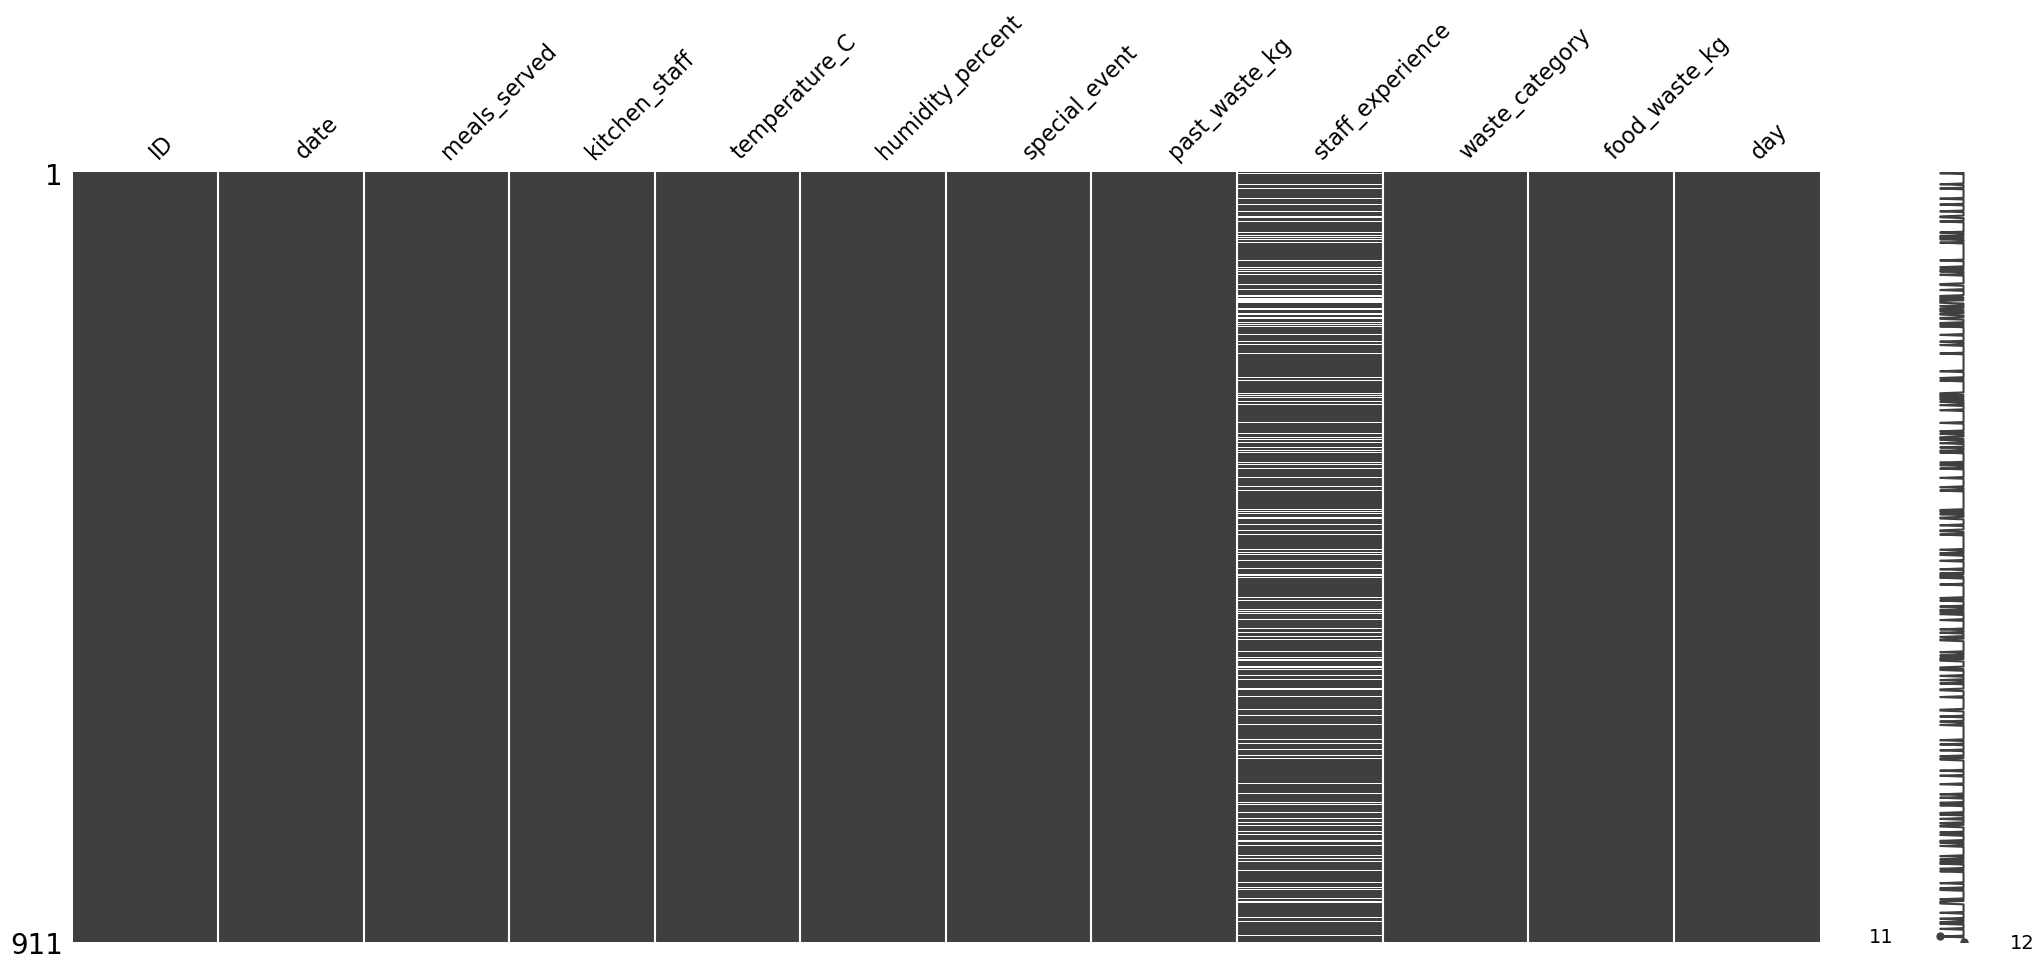

In [15]:
mn.matrix(train)

In [16]:
# Another way of checking for missing values
train.isnull()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg,day
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
906,False,False,False,False,False,False,False,False,False,False,False,False
907,False,False,False,False,False,False,False,False,False,False,False,False
908,False,False,False,False,False,False,False,False,False,False,False,False
909,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
train.isnull().sum() #.sum() counts the number of Trues in each column

ID                    0
date                  0
meals_served          0
kitchen_staff         0
temperature_C         0
humidity_percent      0
special_event         0
past_waste_kg         0
staff_experience    164
waste_category        0
food_waste_kg         0
day                   0
dtype: int64

In [18]:
# Quantify the missingness in order to know what to do with the missing values
# e.g if you're missing 50% of the data, you can drop the columns

total_values = train.count() # counts all values, whether null or not
total_missing=train.isnull().sum()
percent_missing = (total_missing/total_values)*100
percent_missing


ID                   0.000000
date                 0.000000
meals_served         0.000000
kitchen_staff        0.000000
temperature_C        0.000000
humidity_percent     0.000000
special_event        0.000000
past_waste_kg        0.000000
staff_experience    21.954485
waste_category       0.000000
food_waste_kg        0.000000
day                  0.000000
dtype: float64

In [19]:
# Creating a mask to filter all the null value to try and see why that column has missingness
null_mask = train.isnull().any(axis=1)
df_nulls=train[null_mask]
df_nulls
# Since there is no clear pattern for missingness, we can impute

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg,day
1,1,2023-11-21,244,15,10.317872,64.430475,0,42.311779,NaN,meat,51.549053,1
14,17,2023-04-29,378,12,12.323229,68.060384,0,41.146021,NaN,meat,51.058018,5
19,22,2024-09-09,253,17,12.768711,42.373044,0,6.584683,NaN,dairy,18.665798,0
31,34,2022-12-04,114,8,24.756598,38.251426,0,25.343897,NaN,meat,23.016292,6
38,41,2024-01-01,272,11,16.947552,32.858475,0,30.910364,NaN,meat,39.502640,0
...,...,...,...,...,...,...,...,...,...,...,...,...
882,1019,2022-01-09,302,18,25.138454,65.759331,1,12.473368,NaN,meat,49.759978,6
886,1023,2022-01-26,260,10,30.168112,75.554924,0,21.410180,NaN,vegetables,29.899846,2
888,1025,2024-08-15,449,6,29.964832,84.691278,0,18.051981,NaN,vegetables,37.536338,3
894,1031,2024-06-05,153,12,29.296443,55.832413,0,28.313472,NaN,grains,38.313965,2


### Imputation

Three methods:
1. Median - best for numerical values to avoid bias
2. Mean
3. Mode


In [20]:
train['staff_experience'].fillna(train['staff_experience'].mode()[0], inplace=True)

# We have indexing for mode because we can have multiple modes
# so we are telling it to pick the first mode
train.isnull().sum()

C:\Users\RMwaura\AppData\Local\Temp\ipykernel_28472\2504681774.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['staff_experience'].fillna(train['staff_experience'].mode()[0], inplace=True)


ID                  0
date                0
meals_served        0
kitchen_staff       0
temperature_C       0
humidity_percent    0
special_event       0
past_waste_kg       0
staff_experience    0
waste_category      0
food_waste_kg       0
day                 0
dtype: int64

### Handling Outliers

This is to ensure there is no bias, checking errors and correctness.

In [22]:
# 1. Draw a boxplot - and only plot the numerical columns

numeric_cols = train.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['ID',
 'meals_served',
 'kitchen_staff',
 'temperature_C',
 'humidity_percent',
 'special_event',
 'past_waste_kg',
 'food_waste_kg',
 'day']

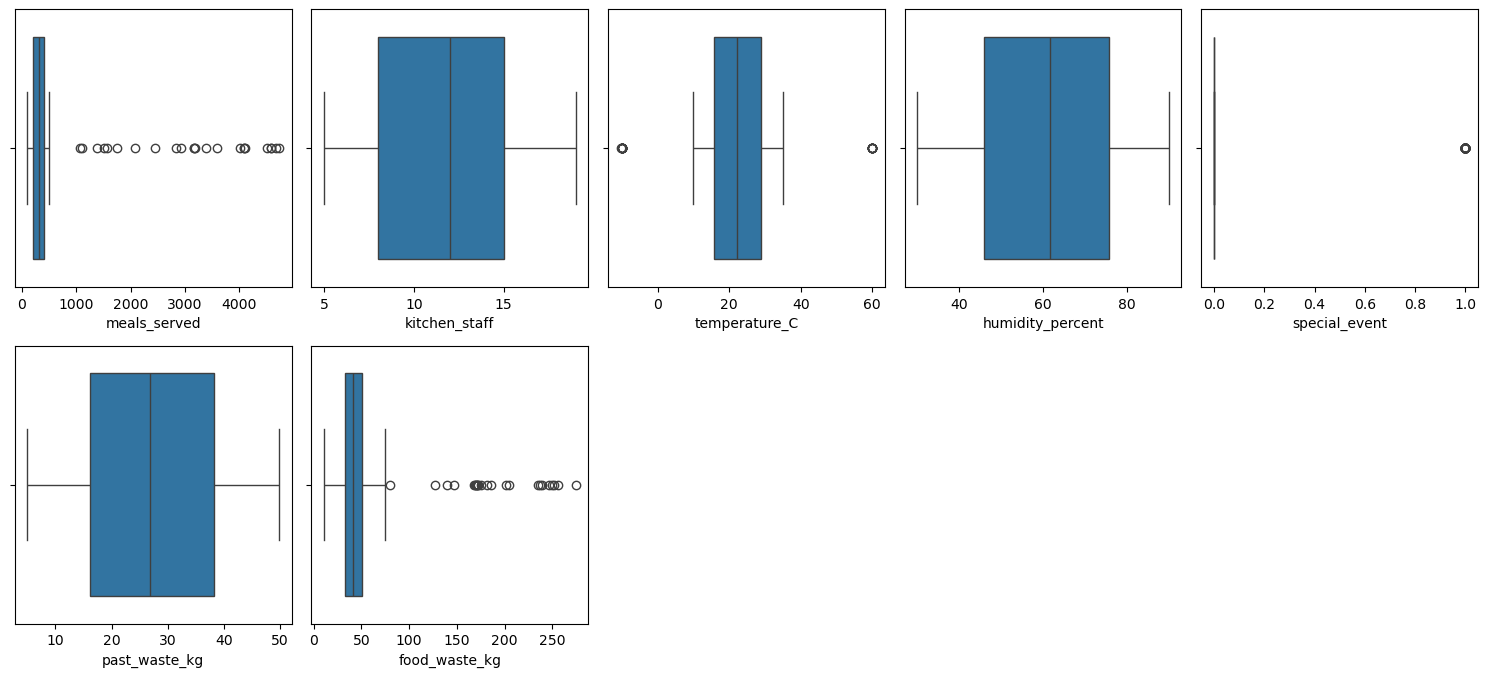

In [24]:
cols = ['meals_served','kitchen_staff','temperature_C','humidity_percent','special_event','past_waste_kg','food_waste_kg']
num_df=train[cols]

fig = plt.figure(figsize=(15,30))

for i in range(len(cols)):
 ax= fig.add_subplot(9, 5, i+1)
 sns.boxplot(x=num_df.iloc[:, i],ax=ax)
    
plt.tight_layout()
plt.show()

In [28]:
Q3 = np.quantile(train['temperature_C'], 0.75)
Q1 = np.quantile(train['temperature_C'], 0.25)

IQR = Q3 - Q1
lower_range = Q1-(1.5*IQR)
upper_range = Q3+ (1.5*IQR)

In [29]:
clean_df = train[(train['temperature_C'] >= lower_range) & (train['temperature_C'] <= upper_range)]
clean_df.shape

(889, 12)

In [ ]:
# Write another condition to give us a df of outliers